***Step-by-Step Guide***

***Step 1: Setting Up Google Colab***

Open Google Colab.

Create a new notebook.

***Step 2: Import Necessary Libraries***

Start by importing the necessary Python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd
import folium

***Step 3: Collect Data***

Air Quality Data

Fetch air quality data from OpenAQ:

In [2]:
# Example function to get air quality data from OpenAQ
def fetch_openaq_data(city='Los Angeles', parameter='pm25', limit=1000):
    url = f'https://api.openaq.org/v1/measurements?city={city}&parameter={parameter}&limit={limit}'
    response = requests.get(url)
    data = response.json()
    return pd.json_normalize(data['results'])

# Fetching data
air_quality_data = fetch_openaq_data()
air_quality_data.head()

,location,parameter,value,unit,country,city,date.utc,date.local,coordinates.latitude,coordinates.longitude
0,Los Ángeles Oriente,pm25,27.0,µg/m³,CL,None,2024-05-31T17:00:00+00:00,2024-05-31T13:00:00-04:00,-37.463035,-72.324575
1,21 de mayo,pm25,45.0,µg/m³,CL,None,2024-05-31T17:00:00+00:00,2024-05-31T13:00:00-04:00,-37.471182,-72.361463
2,Los Ángeles Oriente,pm25,27.0,µg/m³,CL,None,2024-05-31T16:00:00+00:00,2024-05-31T12:00:00-04:00,-37.463035,-72.324575
3,21 de mayo,pm25,45.0,µg/m³,CL,None,2024-05-31T16:00:00+00:00,2024-05-31T12:00:00-04:00,-37.471182,-72.361463
4,21 de mayo,pm25,45.0,µg/m³,CL,None,2024-05-31T15:00:00+00:00,2024-05-31T11:00:00-04:00,-37.471182,-72.361463


***Health Outcome Data***

For demonstration, create synthetic health data. Replace this with real data if available.

In [16]:
# This is an example, only run if using this method.
# Load health outcome data
#health_data_url = 'https://example.com/path-to-health-data.csv'  # Replace with actual URL or file path
#health_data = pd.read_csv(health_data_url)
#health_data.head()

# Create synthetic health data for demonstration
health_data = pd.DataFrame({
    'date': pd.date_range(start='1/1/2024', periods=100, freq='D'),
    'respiratory_diseases': np.random.randint(50, 100, size=100)
})

health_data.head()

,date,respiratory_diseases
0,2024-01-01,84
1,2024-01-02,97
2,2024-01-03,88
3,2024-01-04,56
4,2024-01-05,63


***Step 4: Data Preprocessing***

Convert date columns to datetime format and ensure consistency in timezones.

***Step 5: Merge Datasets***

Merge the datasets based on the date.


In [17]:
# Convert date columns to datetime and ensure the same timezone
air_quality_data['date.utc'] = pd.to_datetime(air_quality_data['date.utc']).dt.tz_localize('UTC').dt.tz_convert(None)
health_data['date'] = pd.to_datetime(health_data['date']).dt.tz_localize(None)

# Debug: Print head of DataFrames before merging
print("Air Quality Data:\n", air_quality_data.head())
print("\nHealth Data:\n", health_data.head())

# Merge datasets based on date
merged_data = pd.merge(air_quality_data, health_data, left_on='date.utc', right_on='date', how='inner')

# Debug: Check if the merged data is empty
if merged_data.empty:
    print("Merged DataFrame is empty. Check for overlapping dates.")
else:
    print("Merged Data:\n", merged_data.head())

Air Quality Data:
               location parameter  value   unit country  city  \
0  Los Ángeles Oriente      pm25   27.0  µg/m³      CL  None   
1           21 de mayo      pm25   45.0  µg/m³      CL  None   
2  Los Ángeles Oriente      pm25   27.0  µg/m³      CL  None   
3           21 de mayo      pm25   45.0  µg/m³      CL  None   
4           21 de mayo      pm25   45.0  µg/m³      CL  None   

             date.utc                 date.local  coordinates.latitude  \
0 2024-05-31 17:00:00  2024-05-31T13:00:00-04:00            -37.463035   
1 2024-05-31 17:00:00  2024-05-31T13:00:00-04:00            -37.471182   
2 2024-05-31 16:00:00  2024-05-31T12:00:00-04:00            -37.463035   
3 2024-05-31 16:00:00  2024-05-31T12:00:00-04:00            -37.471182   
4 2024-05-31 15:00:00  2024-05-31T11:00:00-04:00            -37.471182   

   coordinates.longitude  
0             -72.324575  
1             -72.361463  
2             -72.324575  
3             -72.361463  
4             -7

***Step 6: Data Analysis***

Correlation Analysis

Calculate and visualise the correlation matrix.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


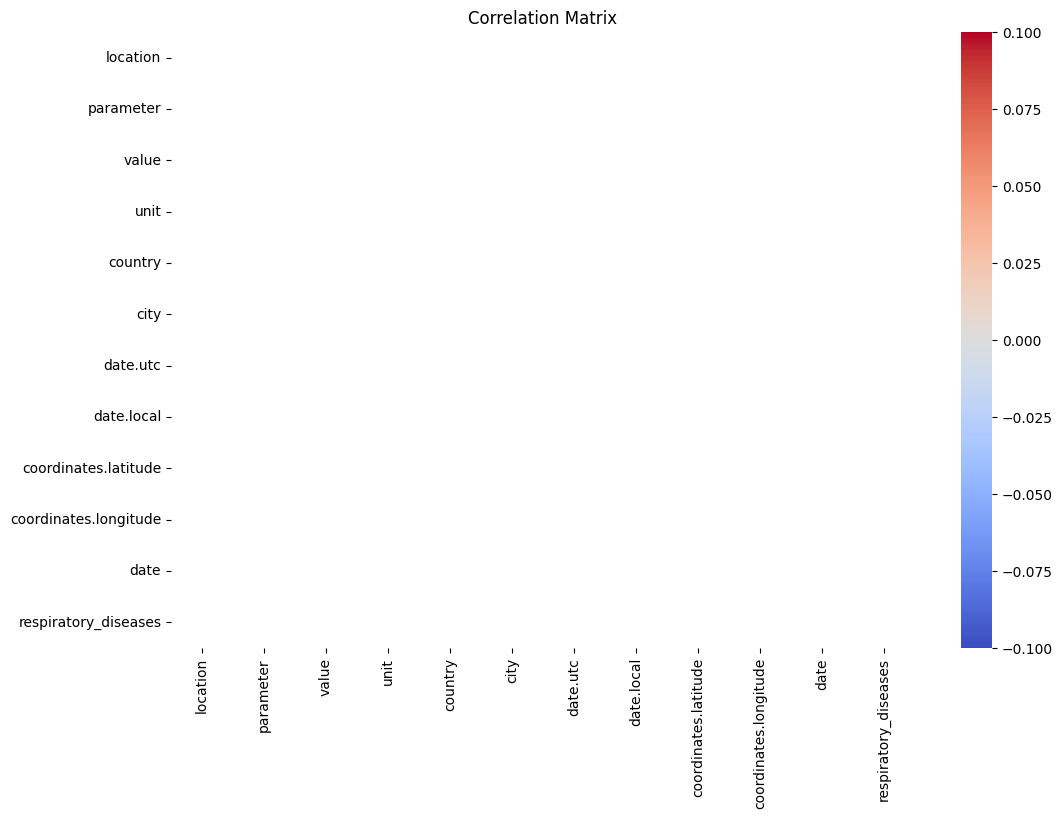

In [8]:
# Calculate correlation matrix
correlation_matrix = merged_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

***Scatter Plot***

Visualise the relationship between PM2.5 levels and respiratory disease incidence.

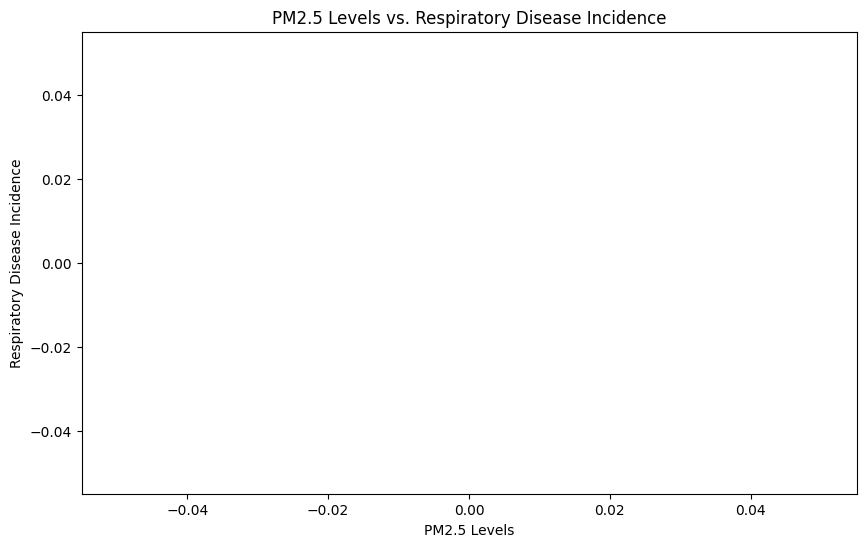

In [9]:
# Scatter plot of PM2.5 levels vs. respiratory disease incidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='respiratory_diseases', data=merged_data)
plt.xlabel('PM2.5 Levels')
plt.ylabel('Respiratory Disease Incidence')
plt.title('PM2.5 Levels vs. Respiratory Disease Incidence')
plt.show()

***Trend Analysis***

Analyse trends over time using line plots.

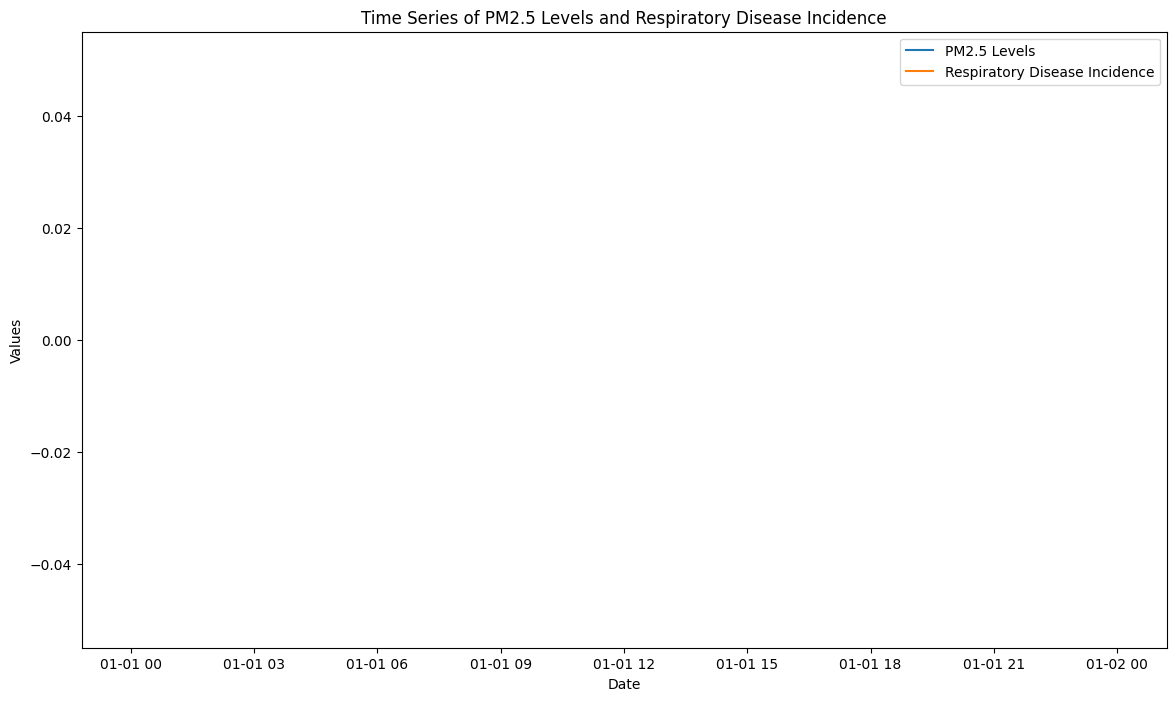

In [10]:
# Time series plot of PM2.5 levels and respiratory disease incidence
plt.figure(figsize=(14, 8))
plt.plot(merged_data['date.utc'], merged_data['value'], label='PM2.5 Levels')
plt.plot(merged_data['date.utc'], merged_data['respiratory_diseases'], label='Respiratory Disease Incidence')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of PM2.5 Levels and Respiratory Disease Incidence')
plt.legend()
plt.show()

***Step 7: Machine Learning (Optional)***

Fit a regression model to predict health outcomes based on pollution levels.

In [11]:
# Prepare data for regression
X = merged_data[['value']]  # PM2.5 levels
y = merged_data['respiratory_diseases']  # Health outcome

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

***Step 8: Create Interactive Maps (Optional)***

Use Folium to create interactive maps showing pollution levels.

In [12]:
# Create a map
map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)  # Coordinates for Los Angeles

# Add points to the map
for idx, row in air_quality_data.iterrows():
    folium.CircleMarker([row['coordinates.latitude'], row['coordinates.longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red',
                        popup=f"PM2.5: {row['value']}").add_to(map)

# Display map
map